Part 1

In [98]:
import intcode as intcode
import random 
import numpy as np
import matplotlib.pyplot as plt

In [105]:
f = open('input_d15.txt',"r")
line = f.readline()
l = [int(i.strip()) for i in line.split(',')]
l = {k: v for k,v in enumerate(l)}

In [106]:
def directions(input_d, point):
    if input_d==1:
        result = (point[0], point[1]+1)
    elif input_d==2:
        result = (point[0], point[1]-1)
    elif input_d==3:
        result = (point[0]-1, point[1])
    elif input_d==4:
        result = (point[0]+1, point[1])
    return result

In [107]:
output = 0
starting_point = (25,25)
i=0
relative_base = 0
cnt = 0
x = np.arange(50)
y = np.arange(50)
z = np.zeros([50,50])
points = [starting_point]
while output!=2:
    j = random.randint(1, 4)
    #print(starting_point)
    s = intcode.TEST3(l,j,i,relative_base)
    output = s[0][0]
    l = s[1]
    i = s[2]
    relative_base = s[3]
    if output == 0:
        starting_point = starting_point
        wall = directions(j, starting_point)
        z[wall[0], wall[1]] = 10
    else:
        starting_point = directions(j, starting_point)
        points.append(starting_point)
        #try:
        #    if points.index(starting_point):
        #        pass
        #except:
        #    points.append(starting_point)
        if output == 2:
            z[starting_point[0], starting_point[1]] = 20
    cnt = cnt+1

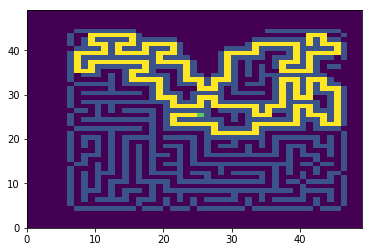

In [118]:
z[25,25]=30
plt.pcolor(x,y,z)

In [114]:
idx = 0
correct_path=[]
while idx<=len(points):
    idx = max(loc for loc, val in enumerate(points) if val == points[idx])
    correct_path.append(points[idx])
    idx = idx+1

IndexError: list index out of range

In [117]:
for i in correct_path:
    z[i[0],i[1]]=40

In [120]:
len(correct_path)-1

236